In [ ]:
import pandas as pd
import io

In [ ]:
all_data=pd.read_csv("Mortality_09_UP.csv",nrows=25175)

<ipython-input-178-8f6863e1231c>:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("Mortality_09_UP.csv",nrows=25175)


In [ ]:
all_data

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [ ]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [ ]:
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)


In [ ]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [ ]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [ ]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [ ]:
x=death.drop('age',axis=1)
y=death['age']

In [ ]:
x.shape

(25175, 9)

In [ ]:
x.dtypes

sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [ ]:
y.shape

(25175,)

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [ ]:
X_train.shape

(18881, 9)

In [ ]:
import tensorflow as tf


In [ ]:
#Build model

model=tf.keras.Sequential()

In [ ]:
bias=tf.keras.initializers.HeNormal()

#model.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",use_bias=True,bias_initializer=bias,input_shape=(9,)))
#model.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal",use_bias=True,bias_initializer=bias))
model.add(tf.keras.layers.Dense(1,kernel_initializer="he_normal",use_bias=True,bias_initializer=bias,input_shape=(9,)))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
learning=model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
1181/1181 [==============================] - 3s 2ms/step - loss: 250.6020 - root_mean_squared_error: 15.8304
Epoch 2/20
1181/1181 [==============================] - 2s 2ms/step - loss: 223.0868 - root_mean_squared_error: 14.9361
Epoch 3/20
1181/1181 [==============================] - 3s 3ms/step - loss: 221.2023 - root_mean_squared_error: 14.8729
Epoch 4/20
1181/1181 [==============================] - 2s 2ms/step - loss: 219.5396 - root_mean_squared_error: 14.8169
Epoch 5/20
1181/1181 [==============================] - 2s 2ms/step - loss: 218.9216 - root_mean_squared_error: 14.7960
Epoch 6/20
1181/1181 [==============================] - 2s 2ms/step - loss: 218.1696 - root_mean_squared_error: 14.7706
Epoch 7/20
1181/1181 [==============================] - 2s 2ms/step - loss: 218.4741 - root_mean_squared_error: 14.7809
Epoch 8/20
1181/1181 [==============================] - 2s 2ms/step - loss: 219.4099 - root_mean_squared_error: 14.8125
Epoch 9/20
1181/1181 [==================

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


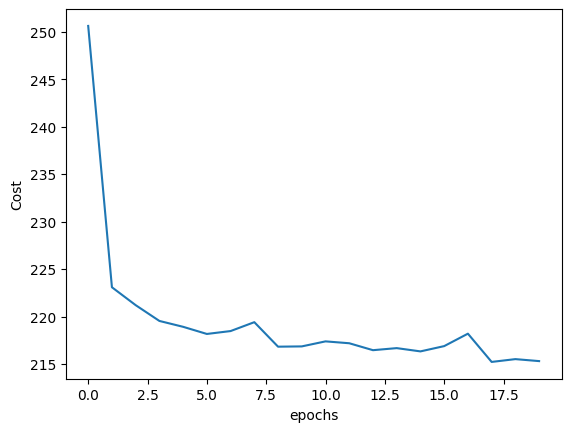

In [ ]:
plot(learning)

In [ ]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(9, 1) dtype=float32, numpy=
 array([[ 1.2948776 ],
        [-0.9871656 ],
        [ 1.5682772 ],
        [ 1.7771232 ],
        [ 0.1619682 ],
        [-0.0295419 ],
        [-0.644777  ],
        [ 1.3822633 ],
        [-0.24721907]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([40.54173], dtype=float32)>]

In [ ]:
import joblib

joblib.dump(model,"model2.pkl")

['model2.pkl']

In [ ]:
#loading
p_model=joblib.load("model2.pkl")

In [ ]:
p_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
p_model.predict(X_test)

197/197 [==============================] - 0s 1ms/step


array([[44.247   ],
       [44.49422 ],
       [37.73932 ],
       ...,
       [44.247   ],
       [45.541878],
       [37.29304 ]], dtype=float32)

In [ ]:
jsonfile=model.to_json()
with open ("model.json","w") as f:
  f.write(jsonfile)

model.save_weights("model.h5")